# Lecture 7 - 8:
- Singular Value Decomposition (SVD)
- Principle Component Analysis (PCA)

__Reading Material:__
- [Scikit-learn: PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Numpy: SVD](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

## Example 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[ 1 -1  0  1  1  2]
 [ 1 -1  1  0  2  1]
 [ 0  6  1  2 -2 -1]]


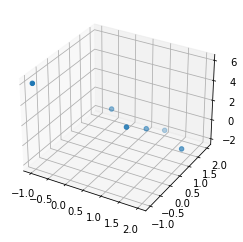

In [2]:
m = 3
n = 6
XData=np.array([[1, 1, 0], 
                [-1, -1, 6], 
                [0, 1, 1],
                [1, 0, 2],
                [1,2,-2],
                [2, 1, -1]]).T
print(XData)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(XData[0,:],XData[1,:],XData[2,:], marker='o')
plt.show()

## Example 2: SVD

In [3]:
from numpy.linalg import svd

First, we find the SVD of the data matrix

In [4]:
U,D,Vh = svd(XData)
print(U)
print(D)
print(Vh)

[[-0.21337314 -0.70993494 -0.67116636]
 [-0.2523085  -0.62363911  0.73987477]
 [ 0.94382855 -0.32721038  0.04605478]]
[7.10505598 3.09571596 1.39094294]
[[-0.06554229  0.8625763   0.09732788  0.23564684 -0.36673141 -0.22841246]
 [-0.4307805  -0.20340633 -0.30715011 -0.4407238  -0.42083719 -0.55441089]
 [ 0.04939701  0.14926586  0.56503364 -0.41630521  0.51509922 -0.46623963]
 [-0.44205816 -0.31524109  0.30188122  0.70725059  0.07676841 -0.32860096]
 [-0.35242778  0.28377273 -0.6101135   0.07689558  0.64444103 -0.04256805]
 [-0.69862118  0.11137229  0.33697525 -0.26609539 -0.04335081  0.55971983]]


In [5]:
U,D,Vh = svd(XData, full_matrices=False)
print(U)
print(D)
print(Vh)

[[-0.21337314 -0.70993494 -0.67116636]
 [-0.2523085  -0.62363911  0.73987477]
 [ 0.94382855 -0.32721038  0.04605478]]
[7.10505598 3.09571596 1.39094294]
[[-0.06554229  0.8625763   0.09732788  0.23564684 -0.36673141 -0.22841246]
 [-0.4307805  -0.20340633 -0.30715011 -0.4407238  -0.42083719 -0.55441089]
 [ 0.04939701  0.14926586  0.56503364 -0.41630521  0.51509922 -0.46623963]]


In [7]:
U@np.diag(D)@Vh - XData

array([[-6.66133815e-16,  2.22044605e-16, -3.33066907e-16,
        -4.44089210e-16, -5.55111512e-16, -8.88178420e-16],
       [-9.99200722e-16,  1.55431223e-15, -8.88178420e-16,
         6.66133815e-16, -1.77635684e-15, -8.88178420e-16],
       [-2.77989437e-16, -5.32907052e-15, -1.11022302e-15,
        -2.66453526e-15,  1.11022302e-15, -2.22044605e-16]])

Now find the centroid (mean) of the data

In [8]:
XDataMean = np.mean(XData.T, axis=0)
print(XDataMean)

[0.66666667 0.66666667 1.        ]


Adjust the data by subtracting the mean

In [9]:
XDataAdj = XData - XDataMean.reshape((m,1))
print(XDataAdj)

[[ 0.33333333 -1.66666667 -0.66666667  0.33333333  0.33333333  1.33333333]
 [ 0.33333333 -1.66666667  0.33333333 -0.66666667  1.33333333  0.33333333]
 [-1.          5.          0.          1.         -3.         -2.        ]]


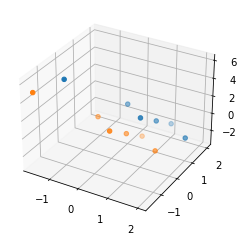

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(XData[0,:],XData[1,:],XData[2,:], marker='o')
ax.scatter(XDataAdj[0,:],XDataAdj[1,:],XDataAdj[2,:], marker='o')
plt.show()

Determine the SVD of the adjusted data matrix

In [11]:
U_Adj,D_Adj,Vh_Adj = svd(XDataAdj)
print(U_Adj)
print(D_Adj) # The last singular value is close to zero.
print(Vh_Adj)

[[-0.27655425 -0.86997189  0.40824829]
 [-0.31557574  0.48347211  0.81649658]
 [ 0.90770573 -0.09697234  0.40824829]]
[6.96587177e+00 1.46400040e+00 4.82213849e-16]
[[-1.58642369e-01  7.93211843e-01  1.13665003e-02  1.47275868e-01
  -4.64560606e-01 -3.28651238e-01]
 [-2.17629162e-02  1.08814581e-01  5.06242095e-01 -4.84479179e-01
   4.40953347e-01 -5.49767928e-01]
 [-8.72860987e-01  1.45153681e-01 -1.60660866e-01 -1.60660866e-01
   2.87593705e-01  2.87593705e-01]
 [-2.97911087e-01 -2.49145719e-01  3.23700377e-01  7.89676032e-01
   1.54761967e-01 -3.11213688e-01]
 [ 3.51341305e-01  5.07879263e-01 -1.25048862e-01  3.06902447e-01
   6.71772015e-01  2.39820707e-01]
 [ 1.67613447e-02  1.33752879e-01  7.72889823e-01  6.95056438e-04
  -1.78338285e-01  5.93856481e-01]]


## Example 3: Thin SVD

We can determine $U_r$, $D_r$, and $V_r$ from the full SVD

In [12]:
r = 2
Ur = U_Adj[:, :2]
Dr = D_Adj[:2]
Vhr = Vh_Adj[:2, :]

Xr = Ur@np.diag(Dr)@Vhr

Compare $X_r$ to the adjusted data $X_{adj}$

In [13]:
Xr - XDataAdj

array([[ 6.10622664e-16, -2.22044605e-16, -1.11022302e-16,
        -5.55111512e-17,  1.11022302e-16,  0.00000000e+00],
       [ 1.83186799e-15, -2.22044605e-16, -2.77555756e-16,
         0.00000000e+00, -4.44089210e-16,  2.22044605e-16],
       [-4.88498131e-15,  2.66453526e-15,  1.29063427e-15,
        -4.44089210e-16, -4.44089210e-16, -2.66453526e-15]])

## Example: PCA

Compute the principal component matrix $C$ 

In [ ]:
C = Ur.T@XDataAdj
print(C)

Verify the formula $X = U_r C$

In [ ]:
print(Ur@C)

In [ ]:
print(Ur@C - XDataAdj)